In [12]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Cloning into 'python-mnist'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 246 (delta 1), reused 2 (delta 0), pack-reused 240
Receiving objects: 100% (246/246), 47.14 KiB | 251.00 KiB/s, done.
Resolving deltas: 100% (119/119), done.
./python-mnist/bin/mnist_get_data.sh: line 9: wget: command not found
~/data ~
gunzip: can't stat: * (*.gz): No such file or directory
~
Imported the EMNIST libraries we need!


In [15]:
X, y = extract_training_samples('digits')
# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


7


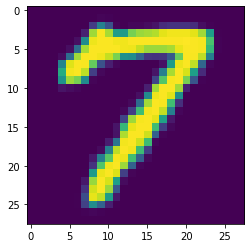

In [28]:
import matplotlib.pyplot as plt

img_index = 90 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print(y_train[img_index])
plt.imshow(img.reshape((28,28)))

In [37]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 10 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [38]:
#fit - seeing how it does for the first time
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 0.96158469
Iteration 2, loss = 0.69337156
Iteration 3, loss = 0.65977850
Iteration 4, loss = 0.64640568
Iteration 5, loss = 0.63058011
Iteration 6, loss = 0.62244975
Iteration 7, loss = 0.61745543
Iteration 8, loss = 0.61232298
Iteration 9, loss = 0.60826573
Iteration 10, loss = 0.60779770
Iteration 11, loss = 0.60481618
Iteration 12, loss = 0.60776171
Iteration 13, loss = 0.60488899
Iteration 14, loss = 0.60332799
Iteration 15, loss = 0.60235368
Iteration 16, loss = 0.60134716
Iteration 17, loss = 0.60315630
Iteration 18, loss = 0.59902039
Iteration 19, loss = 0.60029935
Iteration 20, loss = 0.60003383
Training set score: 0.825300
Test set score: 0.811600


/Users/natalieleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


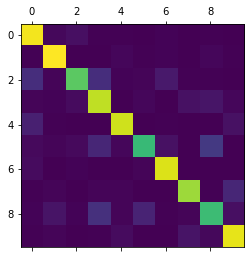

In [39]:
#figuring out where things went wrong
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
#a brighter color means more elements
#The rows are the correct value and the columns are the predicted value
#The diagonal line of cells shows when the predicted value is correct. It's good to see a bright line!
#If any of the cells off the diagonal are particularly bright, we can investigate more.

machine thought a 8 was a 9 37 times.


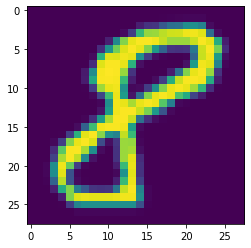

In [122]:
# You can change this to any letters that you think the neural network may have confused...
predicted_digit = 9
actual_digit = 8


# This code counts all mistakes for the letters above
mistake_list = []
#len = .length() of list
for i in range(len(y_test)):
  if (y_test[i] == actual_digit and y_pred[i] == predicted_digit):
    mistake_list.append(i)
print("machine thought a " + str(actual_digit) + " was a " + str(predicted_digit) + " " + str(len(mistake_list)) + " times.")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 1 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [59]:
#make better mlp!
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.26728975
Iteration 2, loss = 0.11250480
Iteration 3, loss = 0.08903747
Iteration 4, loss = 0.07545540
Iteration 5, loss = 0.06284995
Iteration 6, loss = 0.05893069
Iteration 7, loss = 0.05110787
Iteration 8, loss = 0.04721978
Iteration 9, loss = 0.04283940
Iteration 10, loss = 0.03984156
Iteration 11, loss = 0.03665117
Iteration 12, loss = 0.03426456
Iteration 13, loss = 0.03541070
Iteration 14, loss = 0.02935781
Iteration 15, loss = 0.02957894
Iteration 16, loss = 0.02595970
Iteration 17, loss = 0.02881173
Iteration 18, loss = 0.02605633
Iteration 19, loss = 0.02129658
Iteration 20, loss = 0.02533512
Iteration 21, loss = 0.02951513
Iteration 22, loss = 0.02277859
Iteration 23, loss = 0.01785060
Iteration 24, loss = 0.01904579
Iteration 25, loss = 0.01917316
Iteration 26, loss = 0.01867210
Iteration 27, loss = 0.01587030
Iteration 28, loss = 0.01430908
Iteration 29, loss = 0.01631996
Iteration 30, loss = 0.01762029
Iteration 31, loss = 0.01786097
Iteration 32, los

In [116]:
# importing cv2 
!pip install opencv-python
import cv2
  
# path
path = '/Users/natalieleung/Desktop/five.jpeg'
  
# Using cv2.imread() method
myimg = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


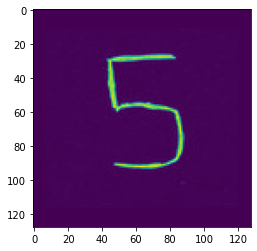

In [117]:
import matplotlib.pyplot as plt
plt.imshow(myimg)

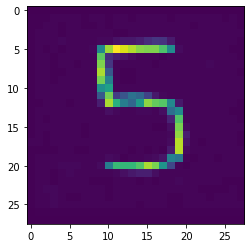

In [118]:
#step 1: Apply Gaussian blur filter
myimg = cv2.GaussianBlur(myimg, (7,7), 0)

#steps 2 and 3: Extract the Region of Interest in the image and center in square
points = cv2.findNonZero(myimg)
x, y, w, h = cv2.boundingRect(points)
if (w > 0 and h > 0):
    if w > h:
        y = y - (w-h)//2
        myimg = myimg[y:y+w, x:x+w]
    else:
        x = x - (h-w)//2
        myimg = myimg[y:y+h, x:x+h]
#step 4: Resize and resample to be 28 x 28 pixels
myimg = cv2.resize(myimg, (28,28), interpolation = cv2.INTER_CUBIC)

#step 5: Normalize pixels and reshape before adding to the new story array
myimg = myimg/255
myimg = myimg.reshape((28,28))
plt.imshow(myimg)

In [119]:
prediction = mlp2.predict(myimg.reshape(1,784))
print(prediction)

[5]
